In [165]:
import numpy as np
from numpy import where
from numpy import meshgrid
from numpy import arange
from numpy import hstack
from sklearn.datasets import make_blobs
from matplotlib import pyplot
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LogisticRegression

In [166]:
def logistic_regression_with_l1(x_train: np.array, y_train: np.array, x_test: np.array,
        penalty=None, C=1, l1_ratio=None, draw=False, degree=1):
    
    # проверка параметров
    assert C > 0, 'Сила регуляризации дожна быть больше, чем 0!'
    if l1_ratio is not None:
        assert 0 <= l1_ratio <= 1, 'Параметр l1_ration должен быть удовлетворять неравенству 0 <= l1_ratio <= 1!'
    assert degree > 0 and isinstance(degree, int), 'Параметр degree должен быть целым положительным числом!'
    assert len(np.unique(y_train)), 'В y_train должно быть больше одного класса!'
    
    if x_train.shape[0] < 2**x_train.shape[1]:
        print('Для оптимального результата количество наблюдений должно быть больше 2^k.')
        IsContinue = int(input('Все равно продолжить? (0/1): '))
        if not IsContinue:
            return
    
    poly = PolynomialFeatures(degree, include_bias=False)
    
    x_poly = poly.fit_transform(x_train)
    x_poly_test = poly.transform(x_test)
    
    if penalty == 'l1':
        penalty = 'elasticnet'
        l1_ratio = 1
    elif penalty != 'l1':
        penalty = 'elasticnet'
        if l1_ratio is None:
            l1_ratio = 0.8
    
    model = LogisticRegression(max_iter=50_000, penalty=penalty, solver='saga', l1_ratio=l1_ratio, C=C)
    model.fit(x_poly, y_train)
    y_pred = model.predict(x_poly_test)
    
    res = {'x_test': x_poly_test,
           'y_pred': y_pred,
           'intercept': model.intercept_,
           'coef': model.coef_}
    
    if draw:
        # create scatter plot for samples from each class
        for class_value in range(2):
            # get row indexes for samples with this class
            row_ix = where(y_pred == class_value)
            # create scatter of these samples
            pyplot.scatter(x_poly_test[row_ix, 0], x_poly_test[row_ix, 1])
        # show the plot
        pyplot.show()
    
    return res

In [167]:
X, y = make_blobs(n_samples=1000, centers=2, n_features=2, random_state=1, cluster_std=3)

In [168]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 3)

In [169]:
res = logistic_regression_with_l1(x_train, y_train, x_test)

In [170]:
X = x_test

In [171]:
# определение границ
min1, max1 = X[:, 0].min()-1, X[:, 0].max()+1
min2, max2 = X[:, 1].min()-1, X[:, 1].max()+1


In [172]:
# определяем масштаб x и y
x1grid = arange(min1, max1, 0.1)
x2grid = arange(min2, max2, 0.1)


In [173]:
# создаем все линии и строки сетки
xx, yy = meshgrid(x1grid, x2grid)


In [174]:
# сводим каждую сетку к вектору
r1, r2 = xx.flatten(), yy.flatten()
r1, r2 = r1.reshape((len(r1), 1)), r2.reshape((len(r2), 1))


In [175]:
grid = hstack((r1,r2))

In [176]:
zz = yhat.reshape(xx.shape)

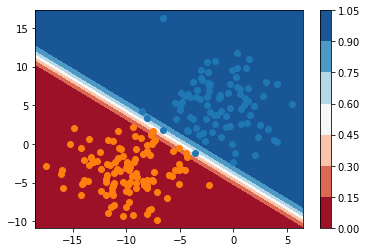

In [177]:
c = pyplot.contourf(xx, yy, zz, cmap='RdBu')

pyplot.colorbar(c)
# создайте точечную диаграмму для образцов из каждого класса
for class_value in range(2):
    # получаем индексы строк для образцов
    row_ix = where(res['y_pred'] == class_value)
    # создаем разброс этих образцов
    pyplot.scatter(X[row_ix, 0], X[row_ix, 1], cmap='Paired')

pyplot.show()